### Projeto Final Para Conclusão do Curso de Cientista de Dados

Instituição: Infnet

Aluno: Marcio Carvalho

Projeto: Predição da expectativa de vida no mundo de acordo diversos fatores de saúde e sócio econômicos.

Dados: O repositório de dados é da Global Health Observatory (GHO), portal de conjunto de dados da Organização Mundial da Saúde (OMS) para estatísticas relacionadas à saúde de 183 Estados Membros. Os dados econômicos correspondentes foram coletados do site das Nações Unidas. Inicialmente os respectivos dados foram coletados e organizados no Site: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who. pelo responsável KumarRajarshi.
             


Período: 2000-2015

As colunas a seguir estão incluídas no conjunto de dados:

• Country: país - 193 países

• year: Anos (2000 - 2015)

• Status: país desenvolvido ou em desenvolvimento

• Adult Mortality: Taxas de mortalidade adulta de ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes)

• infant Deaths: Número de óbitos infantis por 1.000 habitantes

• Alcohol: Álcool, consumo registrado per capita (15+) (em litros de álcool puro)

• percentage expenditure: Despesa percentual - Gastos com saúde como porcentagem do Produto Interno Bruto per capita (%)

• Hepatitis B: Cobertura vacinal contra hepatite B (HepB) em crianças de 1 ano (%)

• Measles: Sarampo - número de casos notificados por 1000 habitantes

• BMI: Índice de Massa Corporal Médio de toda a população

• under-five deathes: Número de mortes de menores de cinco anos por 1000 habitantes

• Polio: Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%)

• Total expenditure: Despesas totais - Gastos do governo geral com saúde como porcentagem do gasto total do governo (%)

• Polio: Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%)

• Diphtheria: Difteria - Cobertura vacinal contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano de idade (%)

• HIV/AIDS: Mortes por 1000 nascidos vivos HIV/AIDS (0-4 anos)

• GDP: Produto Interno Bruto per capita (em USD)

• Population: População do país

• thinness 1-19 years: Prevalência de magreza em crianças e adolescentes de 1 a 19 anos (%)

• thinness 5-9 years: Prevalência de magreza em crianças de 5 a 9 anos (%)

• Income composition of resources: Índice de Desenvolvimento Humano em termos de composição de renda dos recursos (índice variando de 0 a 1)

• Schooling: Número de anos de escolaridade (anos)

• Life Expectancy: Expectativa de vida em anos (coluna Alvo)


### Criação do Modelo de Predição

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Prepararação dos modelos:

In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn import (ensemble,preprocessing,tree)
from sklearn.model_selection import (train_test_split,StratifiedKFold)
from sklearn import model_selection
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (precision_score)
from sklearn.metrics import mean_squared_error
import xgboost

In [26]:
df_model = df_full_final.drop(columns=['PaIs','Ano'])
df_model = pd.get_dummies(df_model,columns=['Classificacao'])

In [11]:
df_model. to_parquet('dados_para_modelos.parquet')

In [21]:
df_model

In [40]:
df_model.columns

Index(['Expectativa_de_Vida', 'Taxa_Mortalidade_Adulto',
       'Numero_Obito_Infantil', 'Consumo_Alcool', 'Gastos_Com_Saude',
       'Hepatite_B', 'Sarampo', 'Indice_Massa_Corporal',
       'Mortes_Menores_5anos', 'Cobertura_Polio',
       'Relacao_GastosSaude/despesasTotais', 'Cobertura_Difeteria',
       'Mortes_criancas_0-4a_Hiv_aids', 'PIB', 'Populacao', 'Magreza_1-19anos',
       'Magreza_5-9anos', 'IDH', 'Anos_de_Escolaridade',
       'Classificacao_Developed', 'Classificacao_Developing'],
      dtype='object')

In [28]:
X = df_model.drop(columns='Expectativa_de_Vida')
Y = df_model.Expectativa_de_Vida

In [42]:
X.shape

(2928, 20)

In [43]:
Y.shape

(2928,)

In [29]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=20,stratify =X['Classificacao_Developing']) # perguntar sobre stratify = Y 

In [45]:
X_train

,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade,Classificacao_Developed,Classificacao_Developing
2810,116.0,0,6.172667,0.000000,95.000000,0,64.0,0,95.0,8.75,95.0,0.1,15524.842470,3431552.0,1.5,1.4,0.794,15.5,0,1
2886,137.0,30,2.190000,0.000000,78.000000,2297,1.4,37,96.0,4.84,99.0,0.2,1216.214570,1423409.0,15.6,16.2,0.592,10.9,0,1
625,95.0,1,3.924667,0.000000,92.000000,0,6.5,1,92.0,8.62,92.0,0.1,1146.362730,487852.0,1.7,1.7,0.775,14.2,0,1
2150,37.0,22,10.180000,224.460025,92.333333,4800,54.0,26,97.0,5.42,96.0,0.2,1771.586620,146596557.0,2.9,3.0,0.709,12.1,0,1
1834,64.0,1,9.330000,1035.621437,48.200000,15,59.3,1,97.0,1.48,97.0,0.1,5338.254830,16615394.0,1.0,0.9,0.906,17.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,183.0,25,0.220000,6.193570,89.000000,189,15.9,32,93.0,6.41,89.0,0.2,48.729900,2674113.0,16.9,17.4,0.502,10.5,0,1
1430,213.0,9,5.390000,0.000000,78.000000,113,18.7,13,79.0,2.20,78.0,0.3,1216.214570,1423409.0,9.2,9.4,0.542,9.9,0,1
2450,145.0,4,1.960000,120.247171,98.000000,0,17.2,5,98.0,4.60,98.0,0.1,1448.761100,1952.0,15.4,15.5,0.718,13.1,0,1
271,196.0,0,4.790000,219.023984,76.000000,0,4.8,0,91.0,3.98,91.0,0.3,3364.423711,247315.0,3.8,3.7,0.668,11.7,0,1


In [30]:
scaler = preprocessing.StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_train2 = pd.DataFrame(X_train1,columns=X.columns)
X_test1 = scaler.transform(X_test)
X_test2 = pd.DataFrame(X_test1,columns=X.columns)

In [47]:
X_train2

,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade,Classificacao_Developed,Classificacao_Developing
0,-0.392706,-0.255695,0.405328,-0.372757,0.636607,-0.214449,1.303340,-0.259549,0.543370,1.169981,0.546379,-0.319962,0.690945,-0.138799,-0.764807,-0.779330,0.787082,1.052757,-0.449177,0.449177
1,-0.226661,-0.017809,-0.595643,-0.372757,-0.043606,-0.026424,-1.850482,-0.044343,0.586460,-0.448702,0.714058,-0.301041,-0.413993,-0.178505,2.390701,2.466742,-0.191391,-0.354812,-0.449177,0.449177
2,-0.558752,-0.247766,-0.159666,-0.372757,0.516570,-0.214449,-1.593541,-0.253732,0.414102,1.116163,0.420620,-0.319962,-0.419387,-0.197004,-0.720048,-0.713532,0.695048,0.654966,-0.449177,0.449177
3,-1.017353,-0.081246,1.412499,-0.255953,0.529907,0.178464,0.799535,-0.108323,0.629550,-0.208590,0.588299,-0.301041,-0.371106,2.691943,-0.451495,-0.428404,0.375349,0.012380,-0.449177,0.449177
4,-0.803866,-0.247766,1.198867,0.166156,-1.235981,-0.213221,1.066552,-0.253732,0.629550,-1.839693,0.630219,-0.319962,-0.095682,0.121880,-0.876705,-0.888995,1.329602,1.511747,2.226296,-2.226296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,0.137057,-0.057457,-1.090767,-0.369534,0.396532,-0.198978,-1.119964,-0.073424,0.457191,0.201255,0.294861,-0.301041,-0.504148,-0.153776,2.681635,2.729937,-0.627344,-0.477209,-0.449177,0.449177
2045,0.374265,-0.184329,0.208619,-0.372757,-0.043606,-0.205199,-0.978898,-0.183936,-0.146064,-1.541624,-0.166255,-0.282119,-0.413993,-0.178505,0.958414,0.975303,-0.433587,-0.660805,-0.449177,0.449177
2046,-0.163406,-0.223977,-0.653450,-0.310183,0.756645,-0.214449,-1.054469,-0.230467,0.672639,-0.548059,0.672138,-0.319962,-0.396035,-0.206611,2.345942,2.313211,0.418944,0.318373,-0.449177,0.449177
2047,0.239847,-0.255695,0.057820,-0.258782,-0.123631,-0.214449,-1.679188,-0.259549,0.371012,-0.804729,0.378701,-0.282119,-0.248105,-0.201760,-0.250079,-0.274873,0.176748,-0.110017,-0.449177,0.449177


In [31]:
# Selecionando modelos com configuração padrão a partir dos melhores resultados.
X_rank = pd.concat([X_train2, X_test2])
Y_rank = pd.concat([Y_train, Y_test])
for model in [DummyRegressor,SVR,DecisionTreeRegressor,RandomForestRegressor,ensemble.GradientBoostingRegressor,MLPRegressor]:
  cls = model()
  kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=20 )
  s = model_selection.cross_val_score(cls, X_rank, Y_rank, scoring="neg_root_mean_squared_error", cv=kfold)
  print(f"{model.__name__:22} AUC: "f"{s.mean():.3f} STD: {s.std():.2f}")

DummyRegressor         AUC: -9.520 STD: 0.27
SVR                    AUC: -3.464 STD: 0.23
DecisionTreeRegressor  AUC: -2.620 STD: 0.15
RandomForestRegressor  AUC: -1.812 STD: 0.15
GradientBoostingRegressor AUC: -2.245 STD: 0.14
MLPRegressor           AUC: -3.899 STD: 0.27


In [33]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [40],
    'max_features': [0.4],
    'min_samples_leaf': [3,5,8],
    'min_samples_split': [8,10],
    'n_estimators': [300],
    'random_state': [20],
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 10, n_jobs = -1, verbose = 3,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train2, Y_train)
grid_search.best_params_
    

Fitting 10 folds for each of 6 candidates, totalling 60 fits


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 0.4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300,
 'random_state': 20}

In [101]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 30],
    'max_features': [0.4],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [300,400,500],
    'random_state': [20],
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 10, n_jobs = -1, verbose = 3,scoring='neg_root_mean_squared_error')
grid_search.fit(X_rank, Y_rank)
grid_search.best_params_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 0.4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500,
 'random_state': 20}

In [34]:
best_score = abs(grid_search.best_score_) # Neg RMSE
best_score

1.9920030302927239

In [35]:
mean_squared_error(Y_test,grid_search.predict(X_test1),squared=False)

2.1005779589896076

In [53]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=30, max_features=0.4, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=500, random_state=20)

In [36]:
Y_pred = grid_search.predict(X_test1)

In [37]:
results = pd.DataFrame(zip(Y_test, Y_pred, Y_test - Y_pred), columns = ['Expectativa_real', 'Expectativa_prevista', 'Erro'])
results[::100]

,Expectativa_real,Expectativa_prevista,Erro
0,78.8,79.814571,-1.014571
100,62.2,63.734810,-1.534810
200,53.6,52.861824,0.738176
300,65.7,65.188116,0.511884
400,72.6,71.298296,1.301704
500,68.7,72.072763,-3.372763
600,76.6,76.230259,0.369741
700,72.4,73.571205,-1.171205
800,61.2,62.159038,-0.959038


In [38]:
rf = ensemble.RandomForestRegressor(n_estimators=300, random_state=20) # melhor
rf.fit(X_train1, Y_train)
RandomForestRegressor(max_depth=40, max_features= 0.4,min_samples_leaf=3, min_samples_split=8, n_jobs=None,verbose=0, warm_start=False)

RandomForestRegressor(max_depth=40, max_features=0.4, min_samples_leaf=3,
                      min_samples_split=8)

In [39]:
for col, val in sorted(zip(X_train2.columns,rf.feature_importances_),  key=lambda x: x[1],reverse=True)[:5]: # explicar código
   print(f"{col:10}{val:10.3f}")

Mortes_criancas_0-4a_Hiv_aids     0.593
IDH            0.174
Taxa_Mortalidade_Adulto     0.114
Anos_de_Escolaridade     0.027
Mortes_Menores_5anos     0.022


In [40]:
X_completo = scaler.transform(X)
yhat_completo = grid_search.predict(X_completo)

In [41]:
results = pd.DataFrame(zip(df['PaIs'],df['Ano'],Y, yhat_completo, Y - yhat_completo), columns = ['PaIs','Ano','Expectativa_completo_real', 'Expectativa_completo_previsto', 'Erro'])
results[::150]

,PaIs,Ano,Expectativa_completo_real,Expectativa_completo_previsto,Erro
0,Afghanistan,2015,65.0,62.234992,2.765008
150,Azerbaijan,2009,78.0,74.723982,3.276018
300,Bhutan,2003,63.3,63.253116,0.046884
450,Cabo Verde,2013,72.8,72.244087,0.555913
600,Comoros,2007,66.0,64.131614,1.868386
750,Denmark,2001,77.0,78.703965,-1.703965
900,Fiji,2011,69.2,69.698731,-0.498731
1050,Grenada,2005,71.5,72.504255,-1.004255
1200,Indonesia,2015,69.1,70.665328,-1.565328
1350,Kazakhstan,2009,67.8,67.895779,-0.095779


In [42]:
mean_squared_error(Y,grid_search.predict(X_completo),squared=False)

1.51012531167759

In [43]:
df.insert(4,'Expectativa_de_vida_prevista', yhat_completo)
df

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Expectativa_de_vida_prevista,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,Afghanistan,2015,Developing,65.0,62.234992,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,60.126158,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,60.296714,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,60.160376,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,59.907184,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,45.751896,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,45.469498,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,49.172764,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,47.000315,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


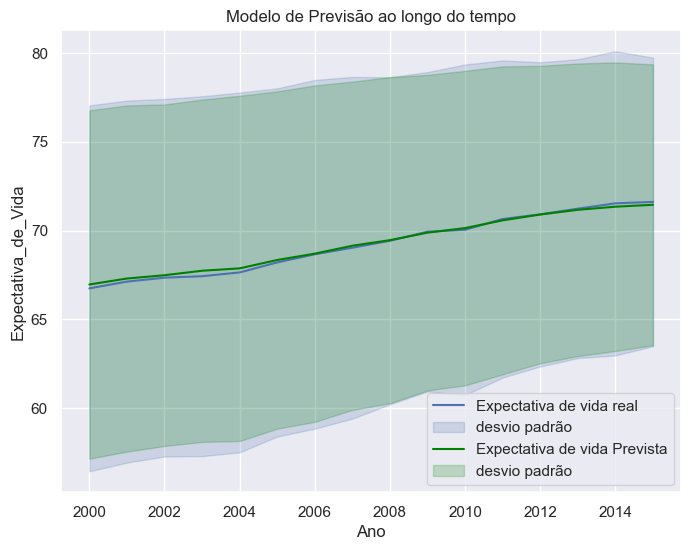

In [46]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(data=df,x='Ano', y='Expectativa_de_Vida',ci='sd')
ax = sns.lineplot(data=results,x='Ano', y='Expectativa_completo_previsto',color='Green',ci='sd')
# Inserindo descritivo na legenda
plt.legend(['Expectativa de vida real','desvio padrão',           'Expectativa de vida Prevista','desvio padrão'],loc=4) 
plt.title('Modelo de Previsão ao longo do tempo')
ax.get_figure().savefig("Previsão_Expectativa_de_vida.png")

In [ ]:
def

In [124]:
df_final_des = df_full_final[df_full_final['Classificacao']=='Developed']
df_final_emdes = df_full_final[df_full_final['Classificacao']=='Developing']

In [125]:
df_final_des

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Expectativa_de_vida_prevista,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
112,Australia,2015,Developed,82.8,82.706449,59.0,1,10.155333,0.00000,93.0,74,66.6,1,93.0,8.836667,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,82.574983,6.0,1,9.710000,10769.36305,91.0,340,66.1,1,92.0,9.420000,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,82.444405,61.0,1,9.870000,11734.85381,91.0,158,65.5,1,91.0,9.360000,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,82.474334,61.0,1,10.030000,11714.99858,91.0,199,65.0,1,92.0,9.360000,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,82.207483,63.0,1,10.300000,10986.26527,92.0,190,64.4,1,92.0,9.200000,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,77.453527,111.0,28,8.480000,0.00000,92.0,37,63.1,33,92.0,15.140000,96.0,0.1,13560.72386,1167660.0,0.7,0.6,0.862,15.8
2806,United States of America,2003,Developed,77.2,77.241945,114.0,28,8.400000,0.00000,92.0,56,62.4,33,91.0,15.600000,96.0,0.1,13560.72386,1167660.0,0.7,0.6,0.862,15.8
2807,United States of America,2002,Developed,77.0,77.162269,115.0,28,8.330000,0.00000,88.0,41,61.7,33,9.0,14.550000,94.0,0.1,13560.72386,1167660.0,0.8,0.6,0.862,15.8
2808,United States of America,2001,Developed,76.9,77.041082,115.0,28,8.250000,0.00000,89.0,116,6.9,33,89.0,13.730000,94.0,0.1,13560.72386,1167660.0,0.8,0.6,0.862,15.8


In [131]:
def tratamento(def_model):
   df_model = def_model.drop(columns=['PaIs','Ano','Expectativa_de_vida_prevista'])
   df_model = pd.get_dummies(df_model,columns=['Classificacao'])
   return df_model

In [ ]:
def separação 

In [132]:
df_model_des = tratamento (df_final_des)
df_model_emdes = tratamento (df_final_emdes)

In [ ]:
# para concluir

In [ ]:
def separacao():
   X = df_model.drop(columns='Expectativa_de_Vida')
   Y = df_model.Expectativa_de_Vida
   return X,Y

In [ ]:
var_X , var_Y = separacao ()

In [ ]:
var_X

In [128]:
df_model_des

,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade,Classificacao_Developed
112,82.8,59.0,1,10.155333,0.00000,93.0,74,66.6,1,93.0,8.836667,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4,1
113,82.7,6.0,1,9.710000,10769.36305,91.0,340,66.1,1,92.0,9.420000,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4,1
114,82.5,61.0,1,9.870000,11734.85381,91.0,158,65.5,1,91.0,9.360000,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3,1
115,82.3,61.0,1,10.030000,11714.99858,91.0,199,65.0,1,92.0,9.360000,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1,1
116,82.0,63.0,1,10.300000,10986.26527,92.0,190,64.4,1,92.0,9.200000,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,77.5,111.0,28,8.480000,0.00000,92.0,37,63.1,33,92.0,15.140000,96.0,0.1,13560.72386,1167660.0,0.7,0.6,0.862,15.8,1
2806,77.2,114.0,28,8.400000,0.00000,92.0,56,62.4,33,91.0,15.600000,96.0,0.1,13560.72386,1167660.0,0.7,0.6,0.862,15.8,1
2807,77.0,115.0,28,8.330000,0.00000,88.0,41,61.7,33,9.0,14.550000,94.0,0.1,13560.72386,1167660.0,0.8,0.6,0.862,15.8,1
2808,76.9,115.0,28,8.250000,0.00000,89.0,116,6.9,33,89.0,13.730000,94.0,0.1,13560.72386,1167660.0,0.8,0.6,0.862,15.8,1


In [ ]:
X = df_model.drop(columns='Expectativa_de_Vida')
Y = df_model.Expectativa_de_Vida